In [ ]:
# timeit : 2 minutes
# Kamille Andrea Lapus Galura
# Cohort 2 - Haight

In [120]:
# importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file in Python
original_df = pd.read_excel(file)

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

In [122]:
# base model building

# descriptive statistics
original_df.describe().round(2)

# missing values 
original_df.isnull().sum()

# looping over columns with missing values
for col in original_df:

    # creating columns with 1s if missing and 0 if not
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['m_'+col] = original_df[col].isnull().astype(int)

# blueprinting a model type
lm_revenue_tot_ord = smf.ols(formula = """REVENUE ~ original_df['TOTAL_MEALS_ORDERED']""",
                        data = original_df)


# telling Python to run the data through the blueprint
results = lm_revenue_tot_ord.fit()


# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1096.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):          4.99e-191
Time:                        22:26:25   Log-Likelihood:                -16020.
No. Observations:                1946   AIC:                         3.204e+04
Df Residuals:                    1944   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

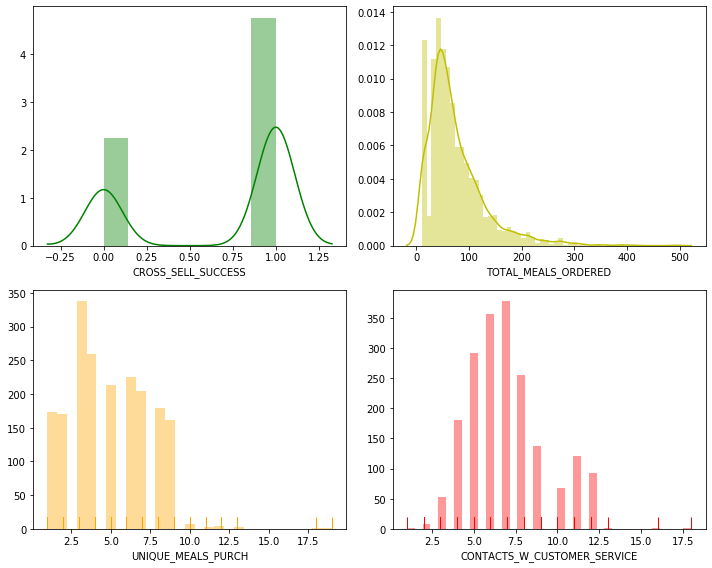

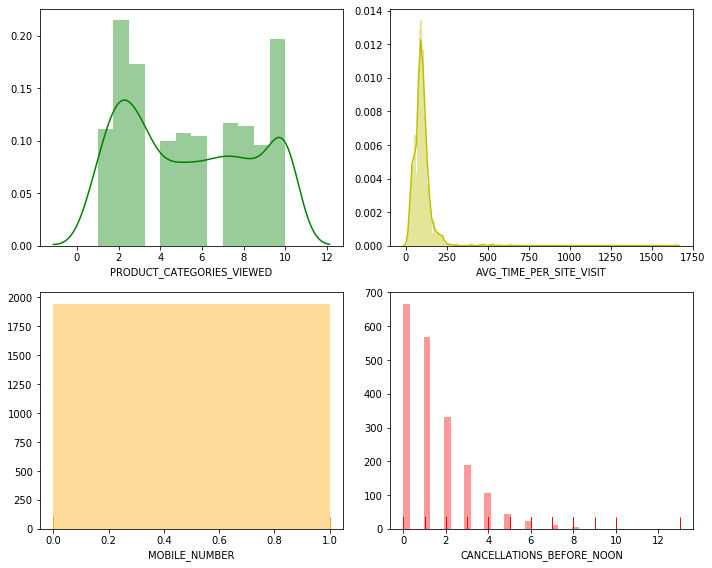

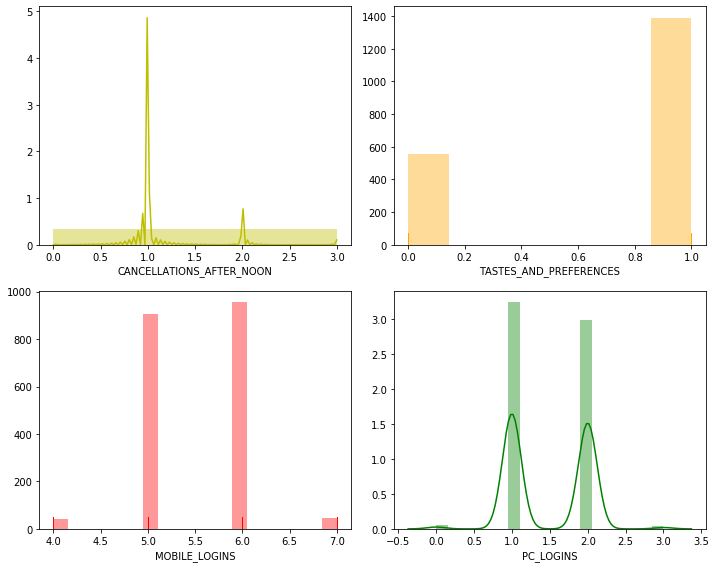

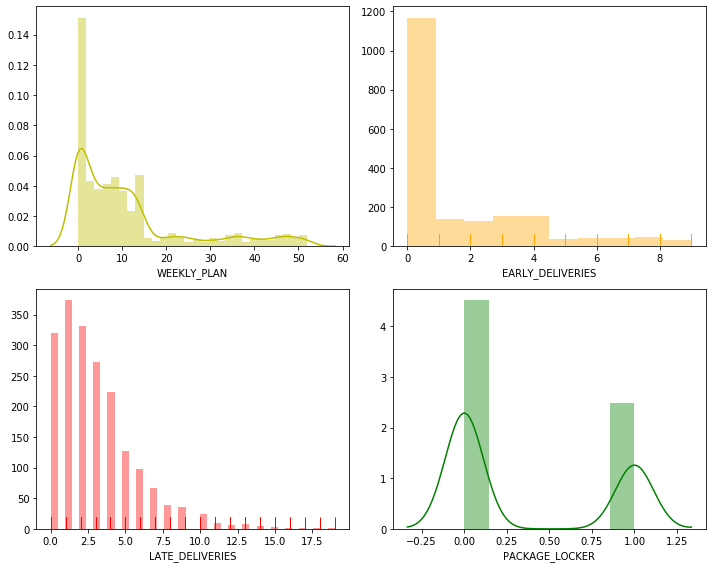

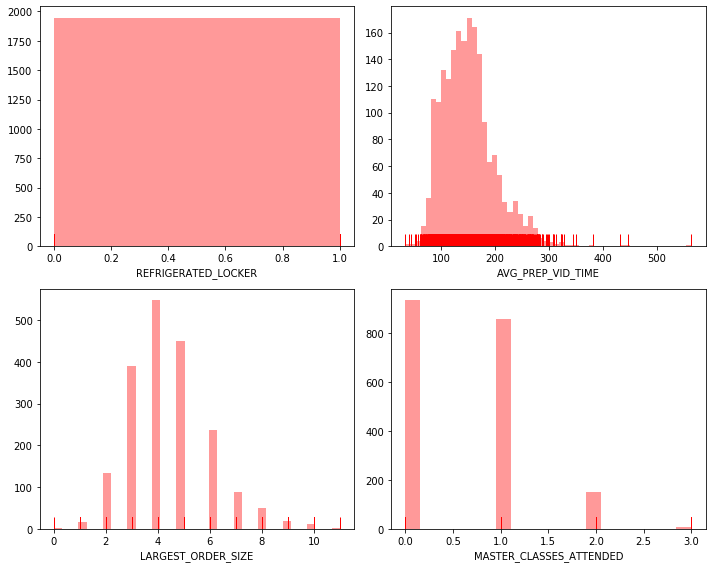

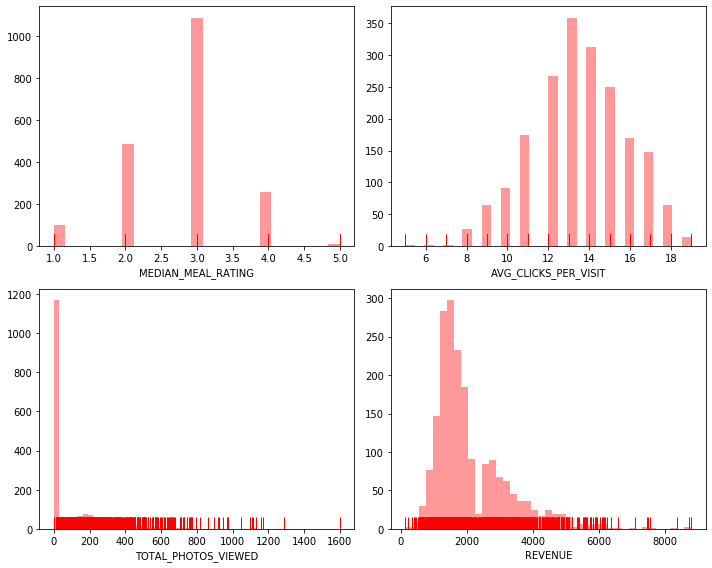

In [123]:
# Visual EDA (Histograms)

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 5 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REVENUE')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 6 of 6.png')
plt.show()

In [124]:
# setting outlier thresholds
TOTAL_MEALS_ORDERED_hi  = 220
TOTAL_MEALS_ORDERED_lo  = 10
CONTACTS_W_CUSTOMER_SERVICE_hi  = 13
CONTACTS_W_CUSTOMER_SERVICE_lo  = 3
AVG_TIME_PER_SITE_VISIT_hi = 250
CANCELLATIONS_BEFORE_NOON_hi = 8
CANCELLATIONS_AFTER_NOON_lo    = 0.5
CANCELLATIONS_AFTER_NOON_hi    = 3
WEEKLY_PLAN_hi = 20
EARLY_DELIVERIES_hi  = 5
LATE_DELIVERIES_hi    = 10
AVG_PREP_VID_TIME_hi  =300
LARGEST_ORDER_SIZE_hi    = 8
LARGEST_ORDER_SIZE_lo    = 1
AVG_CLICKS_PER_VISIT_lo   = 8
AVG_CLICKS_PER_VISIT_hi   = 18
TOTAL_PHOTOS_VIEWED_hi    = 780

REVENUE_hi     = 2500


## Feature Engineering (outlier thresholds)                               

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
condition_lo = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_lo]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)




# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

# AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# CANCELLATIONS_AFTER_NOON
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]
condition_lo = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_lo]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# EARLY_DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LARGEST_ORDER_SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# REVENUE
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_hi]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

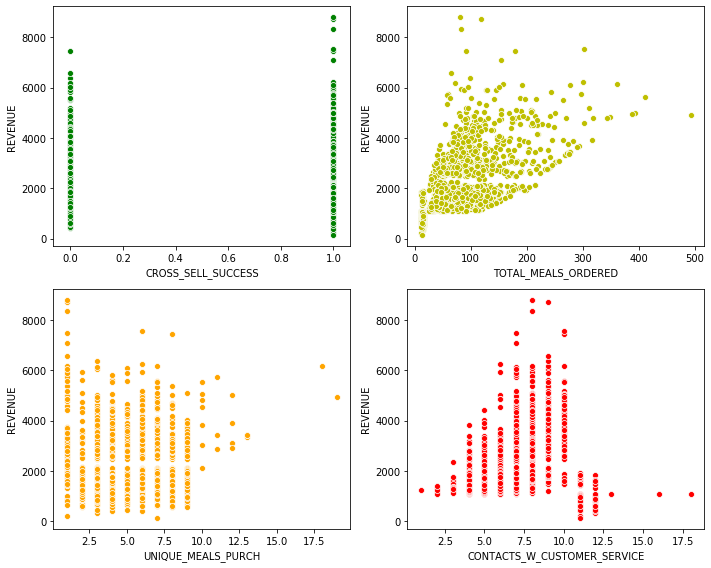

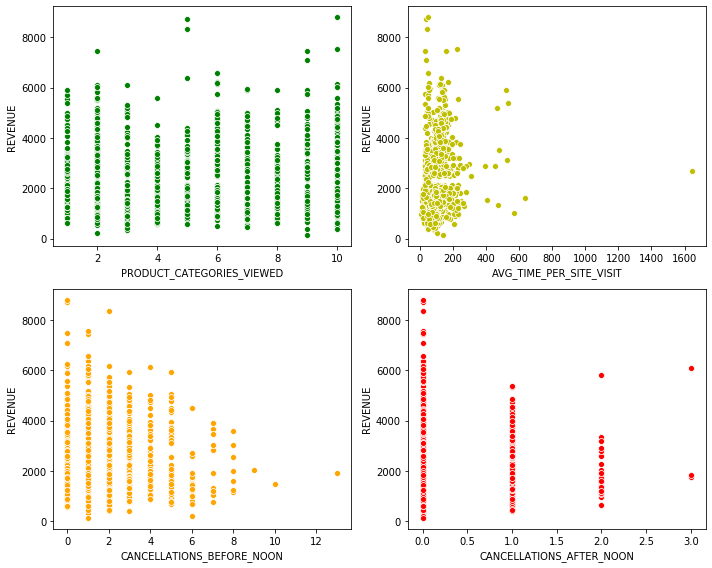

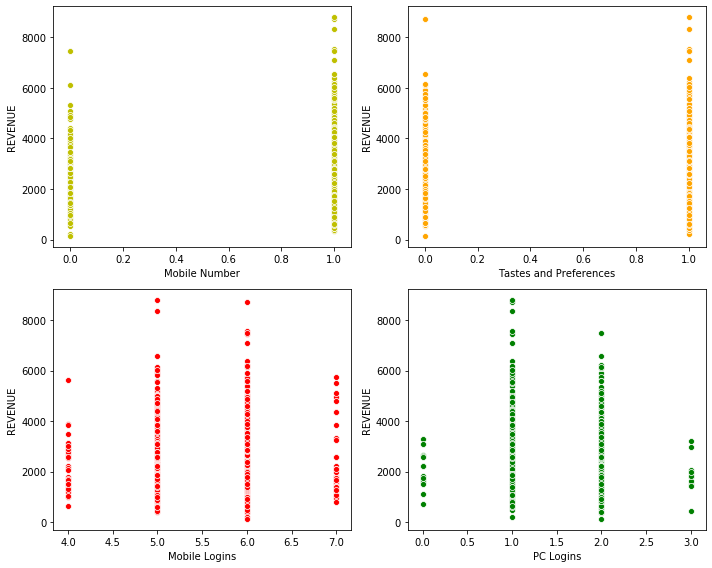

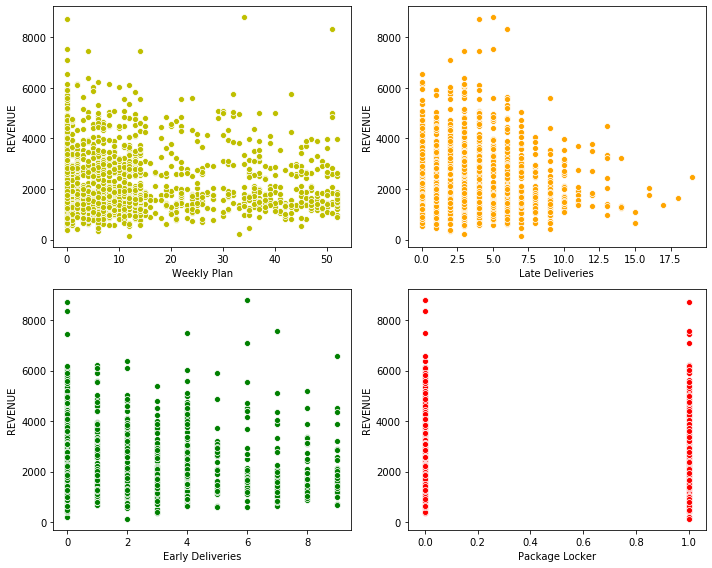

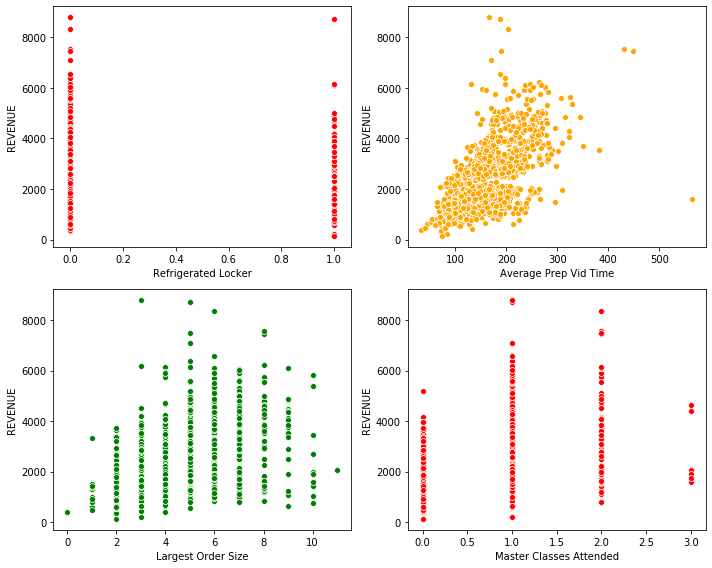

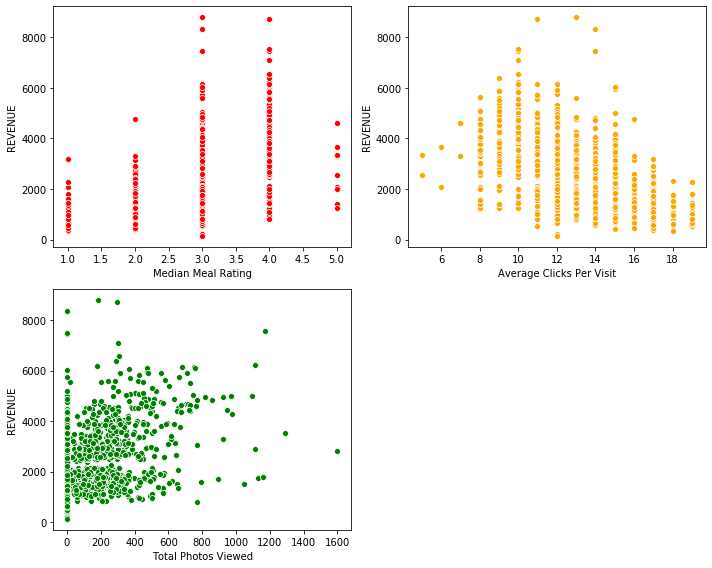

In [125]:
# Visual EDA (Scatterplots)

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CROSS_SELL_SUCCESS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Scatterplots 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Scatterplots 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MOBILE_NUMBER'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Mobile Number')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TASTES_AND_PREFERENCES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Tastes and Preferences')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Mobile Logins')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PC Logins')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Scatterplots 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Weekly Plan')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Late Deliveries')

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Early Deliveries')

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PACKAGE_LOCKER'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Package Locker')

plt.tight_layout()
plt.savefig('Apprentice Chef Data Scatterplots 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Refrigerated Locker')

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Average Prep Vid Time')

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Largest Order Size')

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Master Classes Attended')

plt.tight_layout()
plt.savefig('Apprentice Chef Data Scatterplots 5 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Median Meal Rating')

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Average Clicks Per Visit')

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Total Photos Viewed')

plt.tight_layout()
plt.savefig('Apprentice Chef Data Scatterplots 6 of 6.png')
plt.show()

In [126]:
# setting trend-based thresholds
UNIQUE_MEALS_PURCH_hi = 8.5 # data starts to scatter
TOTAL_MEALS_ORDERED_hi  = 250 # data starts to scatter
CONTACTS_W_CUSTOMER_SERVICE_hi  = 10.0 # Revenue starts to drop
AVG_TIME_PER_SITE_VISIT_hi = 500 # Revenue starts to drop
CANCELLATIONS_BEFORE_NOON_hi = 8 # Data starts to scatter
CANCELLATIONS_AFTER_NOON_hi    = 2.0 # No valuable data after
LATE_DELIVERIES_hi    = 13 # Data starts to scatter
TOTAL_PHOTOS_VIEWED_hi  =  500 # starts to scatter
AVG_PREP_VID_TIME_hi = 280 # starts to scatter

In [127]:
## Feature Engineering (trend changes)                                    
# developing features (columns) for outliers

# greater than sign                

# Total Meals Ordered
original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# Unique Meals Purchased
original_df['change_UNIQUE_MEALS_PURCH'] = 0
condition = original_df.loc[0:,'change_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Contacts with Customer Service
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average time per visit
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellations Before Noon
original_df['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellations After Noon
original_df['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Late Deliveries
original_df['change_LATE_DELIVERIES'] = 0
condition = original_df.loc[0:,'change_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Total Photos Viewed
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average Prep Vid Time
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

In [83]:
# Train/Test Split 
# splitting professional, personal and junk emails
# Note: Be sure to set test_size = 0.25

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [128]:
# renaming column to concatenate
email_df.columns = ['name' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df.loc[:, 'email_domain']],
                   axis = 1)


# printing value counts of personal_email_domain
original_df.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
merck.com            28
mcdonalds.com        28
apple.com            27
nike.com             27
ibm.com              26
ge.org               26
dupont.com           26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
caterpillar.com      22
mmm.com              22
pg.com               22
verizon.com          22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

In [129]:
# email domain types
personal_email_domains      = ['@gmail.com', '@yahoo.com', '@protonmail.com']
professional_email_domains  = ['@mmm.com','@amex.com','@apple.com','@boeing.com',
                               '@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com',
                               '@disney.com','@dupont.com', '@exxon.com','@ge.org','@goldmansacs.com',
                               '@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                               '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com',
                               '@pfizer.com','@pg.com','@travelers.com','@unitedtech.com',
                               '@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']

junk_email_domains          = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']
# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
        
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
original_df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [130]:
# printing columns
print(f"""
Domain EMAIL
-------------
{original_df['domain_group'].value_counts()}
""")


Domain EMAIL
-------------
personal        861
professional    696
junk            389
Name: domain_group, dtype: int64



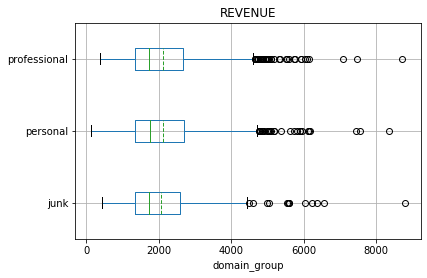

In [131]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'domain_group',
					 data     = original_df)

In [132]:
# one hot encoding categorical variables
one_hot_domain_group = pd.get_dummies(original_df['domain_group'])

# dropping categorical variables after they've been encoded
original_df = original_df.drop('domain_group', axis = 1)

# joining codings together
original_df = original_df.join([one_hot_domain_group])


# saving new columns
new_columns = original_df.columns

In [133]:
# creating a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)


# printing (Pearson) correlations with REVENUE
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                               1.00
out_REVENUE                           0.83
AVG_PREP_VID_TIME                     0.64
MEDIAN_MEAL_RATING                    0.61
TOTAL_MEALS_ORDERED                   0.60
TOTAL_PHOTOS_VIEWED                   0.47
MASTER_CLASSES_ATTENDED               0.45
LARGEST_ORDER_SIZE                    0.44
out_TOTAL_MEALS_ORDERED               0.30
change_TOTAL_PHOTOS_VIEWED            0.29
change_TOTAL_MEALS_ORDERED            0.27
change_AVG_PREP_VID_TIME              0.20
out_AVG_PREP_VID_TIME                 0.19
out_TOTAL_PHOTOS_VIEWED               0.14
AVG_TIME_PER_SITE_VISIT               0.14
CONTACTS_W_CUSTOMER_SERVICE           0.10
out_LARGEST_ORDER_SIZE                0.09
change_AVG_TIME_PER_SITE_VISIT        0.06
out_AVG_TIME_PER_SITE_VISIT           0.05
change_CANCELLATIONS_AFTER_NOON       0.04
out_CANCELLATIONS_AFTER_NOON          0.04
out_WEEKLY_PLAN                       0.03
MOBILE_NUMBER                         0.03
PRODUCT_CAT

In [134]:
# making a copy of dataset
original_df_explanatory = original_df.copy()


# dropping Revenue and Order from the explanatory variable set
original_df_explanatory = original_df_explanatory.drop(columns=['REVENUE', 'NAME', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL', 'email_domain', 'm_FAMILY_NAME'])


# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['out_AVG_TIM

In [135]:
# saving feature-rich dataset in Excel
original_df.to_excel('Chef_feature_rich.xlsx',
                 index = False)

In [137]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """original_df['REVENUE'] ~
                                original_df['CROSS_SELL_SUCCESS'] +
                                original_df['TOTAL_MEALS_ORDERED'] +
                                original_df['UNIQUE_MEALS_PURCH'] +
                                original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
                                original_df['PRODUCT_CATEGORIES_VIEWED'] +
                                original_df['AVG_TIME_PER_SITE_VISIT'] +
                                original_df['MOBILE_NUMBER'] +
                                original_df['CANCELLATIONS_BEFORE_NOON'] +
                                original_df['CANCELLATIONS_AFTER_NOON'] +
                                original_df['TASTES_AND_PREFERENCES'] +
                                original_df['MOBILE_LOGINS'] +
                                original_df['PC_LOGINS'] +
                                original_df['WEEKLY_PLAN'] +
                                original_df['EARLY_DELIVERIES'] +
                                original_df['LATE_DELIVERIES'] +
                                original_df['PACKAGE_LOCKER'] +
                                original_df['REFRIGERATED_LOCKER'] +
                                original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                original_df['AVG_PREP_VID_TIME'] +
                                original_df['LARGEST_ORDER_SIZE'] +
                                original_df['MASTER_CLASSES_ATTENDED'] +
                                original_df['MEDIAN_MEAL_RATING'] +
                                original_df['AVG_CLICKS_PER_VISIT'] +
                                original_df['TOTAL_PHOTOS_VIEWED'] +
                                original_df['out_TOTAL_MEALS_ORDERED'] +
                                original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                original_df['out_AVG_TIME_PER_SITE_VISIT'] +
                                original_df['out_CANCELLATIONS_BEFORE_NOON'] +
                                original_df['out_CANCELLATIONS_AFTER_NOON'] +
                                original_df['out_WEEKLY_PLAN'] +
                                original_df['out_EARLY_DELIVERIES'] +
                                original_df['out_LATE_DELIVERIES'] +
                                original_df['out_AVG_PREP_VID_TIME'] +
                                original_df['out_LARGEST_ORDER_SIZE'] +
                                original_df['out_AVG_CLICKS_PER_VISIT'] +
                                original_df['out_TOTAL_PHOTOS_VIEWED'] +
                                original_df['out_REVENUE'] +
                                original_df['change_TOTAL_MEALS_ORDERED'] +
                                original_df['change_UNIQUE_MEALS_PURCH'] +
                                original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                original_df['change_AVG_TIME_PER_SITE_VISIT'] +
                                original_df['change_CANCELLATIONS_BEFORE_NOON'] +
                                original_df['change_CANCELLATIONS_AFTER_NOON'] +
                                original_df['change_LATE_DELIVERIES'] +
                                original_df['change_TOTAL_PHOTOS_VIEWED'] +
                                original_df['change_AVG_PREP_VID_TIME'] +
                                original_df['junk'] +
                                original_df['personal'] +
                                original_df['professional']""",
                               data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     original_df['REVENUE']   R-squared:                       0.812
Model:                                OLS   Adj. R-squared:                  0.807
Method:                     Least Squares   F-statistic:                     174.4
Date:                    Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                            22:33:54   Log-Likelihood:                -14829.
No. Observations:                    1946   AIC:                         2.975e+04
Df Residuals:                        1898   BIC:                         3.002e+04
Df Model:                              47                                         
Covariance Type:                nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           155.7736    204.786      0.761      0.447    -245.856     557.403
original_df['CROSS_SELL_SUCCESS']                   -49.8051     29.425     -1.693      0.091    -107.515       7.905
original_df['TOTAL_MEALS_ORDERED']                    2.5444      0.336      7.575      0.000       1.886       3.203
original_df['UNIQUE_MEALS_PURCH']                   -44.1321      5.762     -7.660      0.000     -55.432     -32.832
original_df['CONTACTS_W_CUSTOMER_SERVICE']           62.2469      8.432      7.382      0.000      45.709      78.784
original_df['PRODUCT_CATEGORIES_VIEWED']              5.5884      3.780      1.479      0.139      -1.824      13.001
original_df['AVG_TIME_PER_SITE_VISIT']               -0.4259      0.260     -1.636      0.102      -0.936       0.085
original_df['MOBILE_NUMBER']                         51.7236     35.308      1.465      0.143     -17.522     120.970
original_df['CANCELLATIONS_BEFORE_NOON']             -0.6364      7.733     -0.082      0.934     -15.802      14.529
original_df['CANCELLATIONS_AFTER_NOON']              80.5503     88.271      0.913      0.362     -92.568     253.669
original_df['TASTES_AND_PREFERENCES']                19.6491     25.467      0.772      0.440     -30.297      69.595
original_df['MOBILE_LOGINS']                         27.2119     19.771      1.376      0.169     -11.563      65.987
original_df['PC_LOGINS']                            -43.3211     21.781     -1.989      0.047     -86.039      -0.604
original_df['WEEKLY_PLAN']                           -4.6196      1.807     -2.557      0.011      -8.163      -1.077
original_df['EARLY_DELIVERIES']                      -0.2729      7.898     -0.035      0.972     -15.763      15.217
original_df['LATE_DELIVERIES']                        5.1633      4.838      1.067      0.286      -4.325      14.652
original_df['PACKAGE_LOCKER']                       -13.4078     27.293     -0.491      0.623     -66.935      40.120
original_df['REFRIGERATED_LOCKER']                  -25.7239     41.329     -0.622      0.534    -106.780      55.332
original_df['FOLLOWED_RECOMMENDATIONS_PCT']           0.4717      0.488      0.966      0.334      -0.486       1.429
original_df['AVG_PREP_VID_TIME']                      4.2056      0.520      8.085      0.000       3.185       5.226
original_df['LARGEST_ORDER_SIZE']                   -35.1616     13.437     -2.617      0.009     -61.514      -8.809
original_df['MASTER_CLASSES_ATTENDED']               86.4531     21.057      4.106      0.000      45.157     127.750
original_df['MEDIAN_MEAL_RATING']                   130.8319     31.727      4.124      0

In [138]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

original_df.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,out_TOTAL_MEALS_ORDERED,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_WEEKLY_PLAN,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,out_REVENUE,change_TOTAL_MEALS_ORDERED,change_UNIQUE_MEALS_PURCH,change_CONTACTS_W_CUSTOMER_SERVICE,change_AVG_TIME_PER_SITE_VISIT,change_CANCELLATIONS_BEFORE_NOON,change_CANCELLATIONS_AFTER_NOON,change_LATE_DELIVERIES,change_TOTAL_PHOTOS_VIEWED,change_AVG_PREP_VID_TIME,email_domain,junk,personal,professional
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,passport.com,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,jnj.com,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,gmail.com,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ibm.com,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,goldmansacs.com,0,0,1


In [139]:
# preparing explanatory variable data
original_df_data   = original_df.drop(['REVENUE',
                               'out_REVENUE'],
                               axis = 1)


# preparing response variable data
original_df_target = original_df.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 54)
(1459,)
(487, 54)
(487,)


In [140]:
# Ordinary Least Squares Regression

# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
               'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
               'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS',
               'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
               'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
               'out_tot_meals_ord', 'out_contacts_w_customer_service', 'out_avg_time_per_site_visit',
               'out_cancellations_before_noon', 'out_cancellations_after_noon', 'out_weekly_plan', 
               'out_early_deliveries', 'out_late_deliveries', 
               'TOTAL_PHOTOS_VIEWED', 'out_avg_clicks_per_visit', 'out_largest_order', 'out_avg_prep_vid_time',
               'change_tot_meals_ord', 'change_tot_photos_viewed', 'change_avg_prep_vid_time', 'change_avg_time_per_visit',
               'change_cancellations_after_noon', 'change_cancellations_before_noon', 'change_late_deliveries',
               'change_unique_meals_purch', 'change_cont_w_customer_ser']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"original_df_train['{val}'] +")

original_df_train['CROSS_SELL_SUCCESS'] +
original_df_train['TOTAL_MEALS_ORDERED'] +
original_df_train['UNIQUE_MEALS_PURCH'] +
original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_train['PRODUCT_CATEGORIES_VIEWED'] +
original_df_train['AVG_TIME_PER_SITE_VISIT'] +
original_df_train['MOBILE_NUMBER'] +
original_df_train['CANCELLATIONS_BEFORE_NOON'] +
original_df_train['CANCELLATIONS_AFTER_NOON'] +
original_df_train['TASTES_AND_PREFERENCES'] +
original_df_train['MOBILE_LOGINS'] +
original_df_train['PC_LOGINS'] +
original_df_train['WEEKLY_PLAN'] +
original_df_train['EARLY_DELIVERIES'] +
original_df_train['LATE_DELIVERIES'] +
original_df_train['PACKAGE_LOCKER'] +
original_df_train['REFRIGERATED_LOCKER'] +
original_df_train['AVG_PREP_VID_TIME'] +
original_df_train['LARGEST_ORDER_SIZE'] +
original_df_train['MASTER_CLASSES_ATTENDED'] +
original_df_train['MEDIAN_MEAL_RATING'] +
original_df_train['AVG_CLICKS_PER_VISIT'] +
original_df_train['out_tot_meals_ord'] +
original_df_train['out_c

In [141]:
# merging X_train and y_train so that they can be used in statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~ original_df_train['CROSS_SELL_SUCCESS'] +
                                original_df_train['CROSS_SELL_SUCCESS'] +
                                original_df_train['TOTAL_MEALS_ORDERED'] +
                                original_df_train['UNIQUE_MEALS_PURCH'] +
                                original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                original_df_train['PRODUCT_CATEGORIES_VIEWED'] +
                                original_df_train['AVG_TIME_PER_SITE_VISIT'] +
                                original_df_train['MOBILE_NUMBER'] +
                                original_df_train['CANCELLATIONS_BEFORE_NOON'] +
                                original_df_train['CANCELLATIONS_AFTER_NOON'] +
                                original_df_train['TASTES_AND_PREFERENCES'] +
                                original_df_train['MOBILE_LOGINS'] +
                                original_df_train['PC_LOGINS'] +
                                original_df_train['WEEKLY_PLAN'] +
                                original_df_train['EARLY_DELIVERIES'] +
                                original_df_train['LATE_DELIVERIES'] +
                                original_df_train['PACKAGE_LOCKER'] +
                                original_df_train['REFRIGERATED_LOCKER'] +
                                original_df_train['AVG_PREP_VID_TIME'] +
                                original_df_train['LARGEST_ORDER_SIZE'] +
                                original_df_train['MASTER_CLASSES_ATTENDED'] +
                                original_df_train['MEDIAN_MEAL_RATING'] +
                                original_df_train['AVG_CLICKS_PER_VISIT'] +
                                original_df_train['out_TOTAL_MEALS_ORDERED'] +
                                original_df_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                original_df_train['out_AVG_TIME_PER_SITE_VISIT'] +
                                original_df_train['out_CANCELLATIONS_BEFORE_NOON'] +
                                original_df_train['out_CANCELLATIONS_AFTER_NOON'] +
                                original_df_train['out_WEEKLY_PLAN'] +
                                original_df_train['out_EARLY_DELIVERIES'] +
                                original_df_train['out_LATE_DELIVERIES'] +
                                original_df_train['TOTAL_PHOTOS_VIEWED'] +
                                original_df_train['out_AVG_CLICKS_PER_VISIT'] +
                                original_df_train['out_LARGEST_ORDER_SIZE'] +
                                original_df_train['out_AVG_PREP_VID_TIME'] +
                                original_df_train['change_TOTAL_MEALS_ORDERED'] +
                                original_df_train['change_TOTAL_PHOTOS_VIEWED'] +
                                original_df_train['change_AVG_PREP_VID_TIME'] +
                                original_df_train['change_AVG_TIME_PER_SITE_VISIT'] +
                                original_df_train['change_CANCELLATIONS_AFTER_NOON'] +
                                original_df_train['change_CANCELLATIONS_BEFORE_NOON'] +
                                original_df_train['change_LATE_DELIVERIES'] +
                                original_df_train['change_UNIQUE_MEALS_PURCH'] +
                                original_df_train['change_CONTACTS_W_CUSTOMER_SERVICE']""",
                                data = original_df_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     73.22
Date:                Mon, 27 Jan 2020   Prob (F-statistic):          3.50e-320
Time:                        22:34:24   Log-Likelihood:                -11478.
No. Observations:                1459   AIC:                         2.304e+04
Df Residuals:                    1416   BIC:                         2.327e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [142]:
# applying modelin scikit-learn

# preparing x-variables
original_df_data = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
               'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
               'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS',
               'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
               'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
               'out_TOTAL_MEALS_ORDERED', 'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_AVG_TIME_PER_SITE_VISIT',
               'out_CANCELLATIONS_BEFORE_NOON', 'out_CANCELLATIONS_AFTER_NOON', 'out_WEEKLY_PLAN', 
               'out_EARLY_DELIVERIES', 'out_LATE_DELIVERIES', 
               'TOTAL_PHOTOS_VIEWED', 'out_AVG_CLICKS_PER_VISIT', 'out_LARGEST_ORDER_SIZE', 'out_AVG_PREP_VID_TIME',
               'change_TOTAL_MEALS_ORDERED', 'change_TOTAL_PHOTOS_VIEWED', 'change_AVG_PREP_VID_TIME', 'change_AVG_TIME_PER_SITE_VISIT',
               'change_CANCELLATIONS_AFTER_NOON', 'change_CANCELLATIONS_BEFORE_NOON', 'change_LATE_DELIVERIES',
               'change_UNIQUE_MEALS_PURCH', 'change_CONTACTS_W_CUSTOMER_SERVICE']

# preparing response variable
original_df_target = ['REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            original_df[original_df_data],
            original_df[original_df_target],
            test_size = 0.25,
            random_state = 222)

In [143]:
# LinearRegression Model

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))

lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score  = lr.score(X_test, y_test).round(3)

Training Score: 0.685
Testing Score: 0.586


In [144]:
# LinearModel(Ridge)
# INSTANTIATING a model object
import sklearn.linear_model # linear models

ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(3))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(3))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(3)
ridge_test_score  = ridge_model.score(X_test, y_test).round(3)

Training Score: 0.685
Testing Score: 0.588


In [145]:
# LinearModel(Lasso)
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(3))
print('Testing Score:', lasso_model.score(X_train, y_train).round(3))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(3)
lasso_test_score  = lasso_model.score(X_test, y_test).round(3)

Training Score: 0.683
Testing Score: 0.683


In [149]:
# ARD Regression()
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.predict(X_test)


print('Training Score:', ard_model.score(X_train, y_train).round(3))
print('Testing Score:',  ard_model.score(X_test, y_test).round(3))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(3)
ard_test_score  = ard_model.score(X_test, y_test).round(3)

C:\Users\areag\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [148]:
# GBT
from sklearn.ensemble import GradientBoostingRegressor

# GradientBoostingRegressor

# INSTANTIATING a model object
gbt = GradientBoostingRegressor(n_estimators= 150,random_state= 222)


# FITTING the training data
gbt_fit = gbt.fit(X_train, y_train)
random_state= 222

# PREDICTING on new data
gbt_pred = gbt_fit.predict(X_test)


print('Training Score:', gbt.score(X_train, y_train).round(3))
print('Testing Score:',  gbt.score(X_test, y_test).round(3))


# saving scoring data for future use
gbt_train_score = gbt.score(X_train, y_train).round(3)
gbt_test_score  = gbt.score(X_test, y_test).round(3)

C:\Users\areag\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.927
Testing Score: 0.79


In [150]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}        {ridge_test_score}
Lasso      {lasso_train_score}        {lasso_test_score}
ARD        {ard_train_score}          {ard_test_score}
GBT        {gbt_train_score}          {gbt_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD', 'GBT'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score,
                                  gbt_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score,
                                  gbt_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.685           0.586
Ridge      0.685        0.588
Lasso      0.683        0.595
ARD        0.6808          0.596
GBT        0.927          0.79

